In [1]:
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

### countries.csv

In [4]:
countries = pd.read_csv('countries.csv')
print(countries.shape)
countries

(10, 7)


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


### age_gender_bkts.csv

In [6]:
age_gender = pd.read_csv('age_gender_bkts.csv')
print(age_gender.shape)
age_gender.head()

(420, 5)


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [7]:
age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [8]:
age_gender.describe()

,population_in_thousands,year
count,420.000000,420.0
mean,1743.133333,2015.0
std,2509.843202,0.0
min,0.000000,2015.0
25%,396.500000,2015.0
50%,1090.500000,2015.0
75%,1968.000000,2015.0
max,11601.000000,2015.0


In [9]:
print(f"Unique values for year column: {age_gender.year.unique()}")
print(f"Unique values for country_destination column: {age_gender.country_destination.unique()}")
print(f"Unique values for gender column: {age_gender.gender.unique()}")
print(f"Unique values for age_bucket column: {age_gender.age_bucket.unique()}")

Unique values for year column: [2015.]
Unique values for country_destination column: ['AU' 'CA' 'DE' 'ES' 'FR' 'GB' 'IT' 'NL' 'PT' 'US']
Unique values for gender column: ['male' 'female']
Unique values for age_bucket column: ['100+' '95-99' '90-94' '85-89' '80-84' '75-79' '70-74' '65-69' '60-64'
 '55-59' '50-54' '45-49' '40-44' '35-39' '30-34' '25-29' '20-24' '15-19'
 '10-14' '5-9' '0-4']


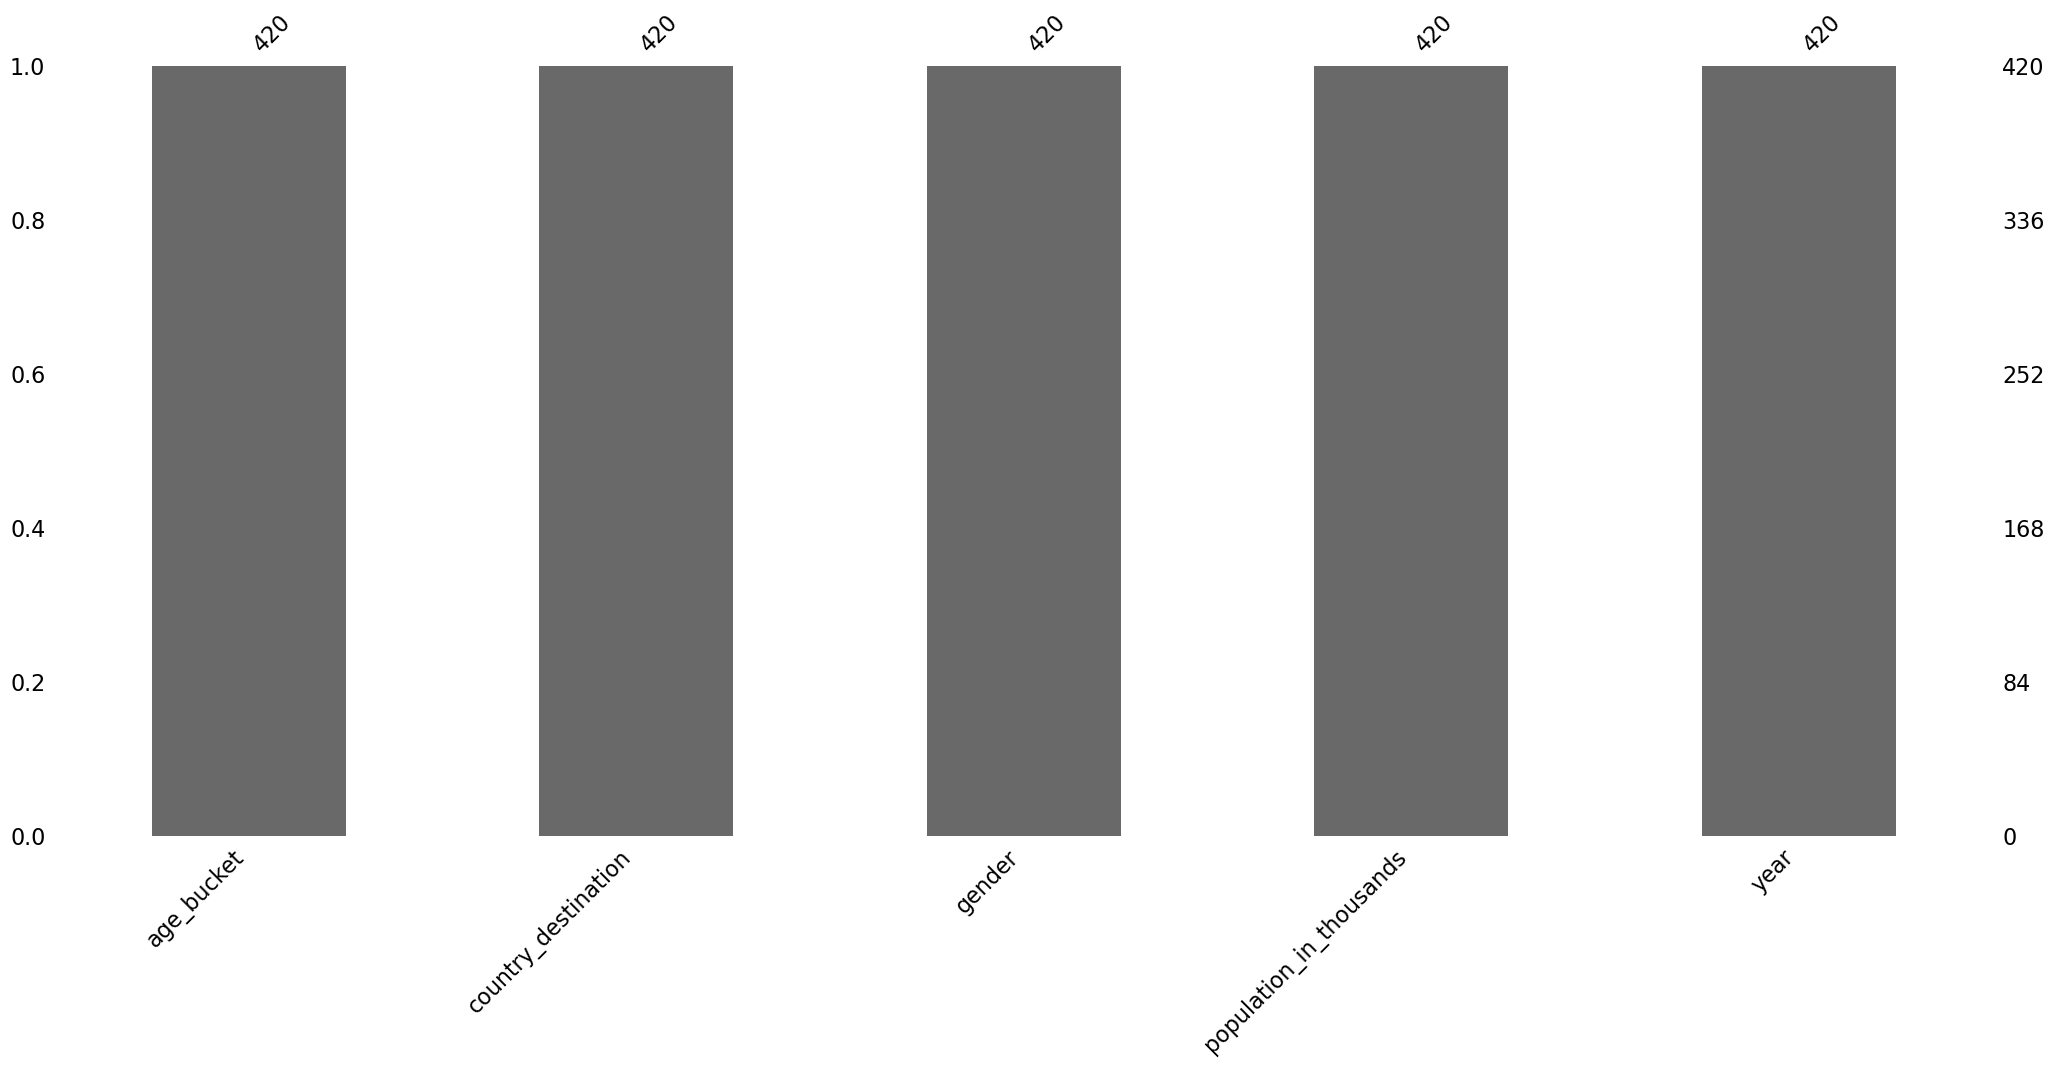

In [10]:
missingno.bar(age_gender)
plt.show()

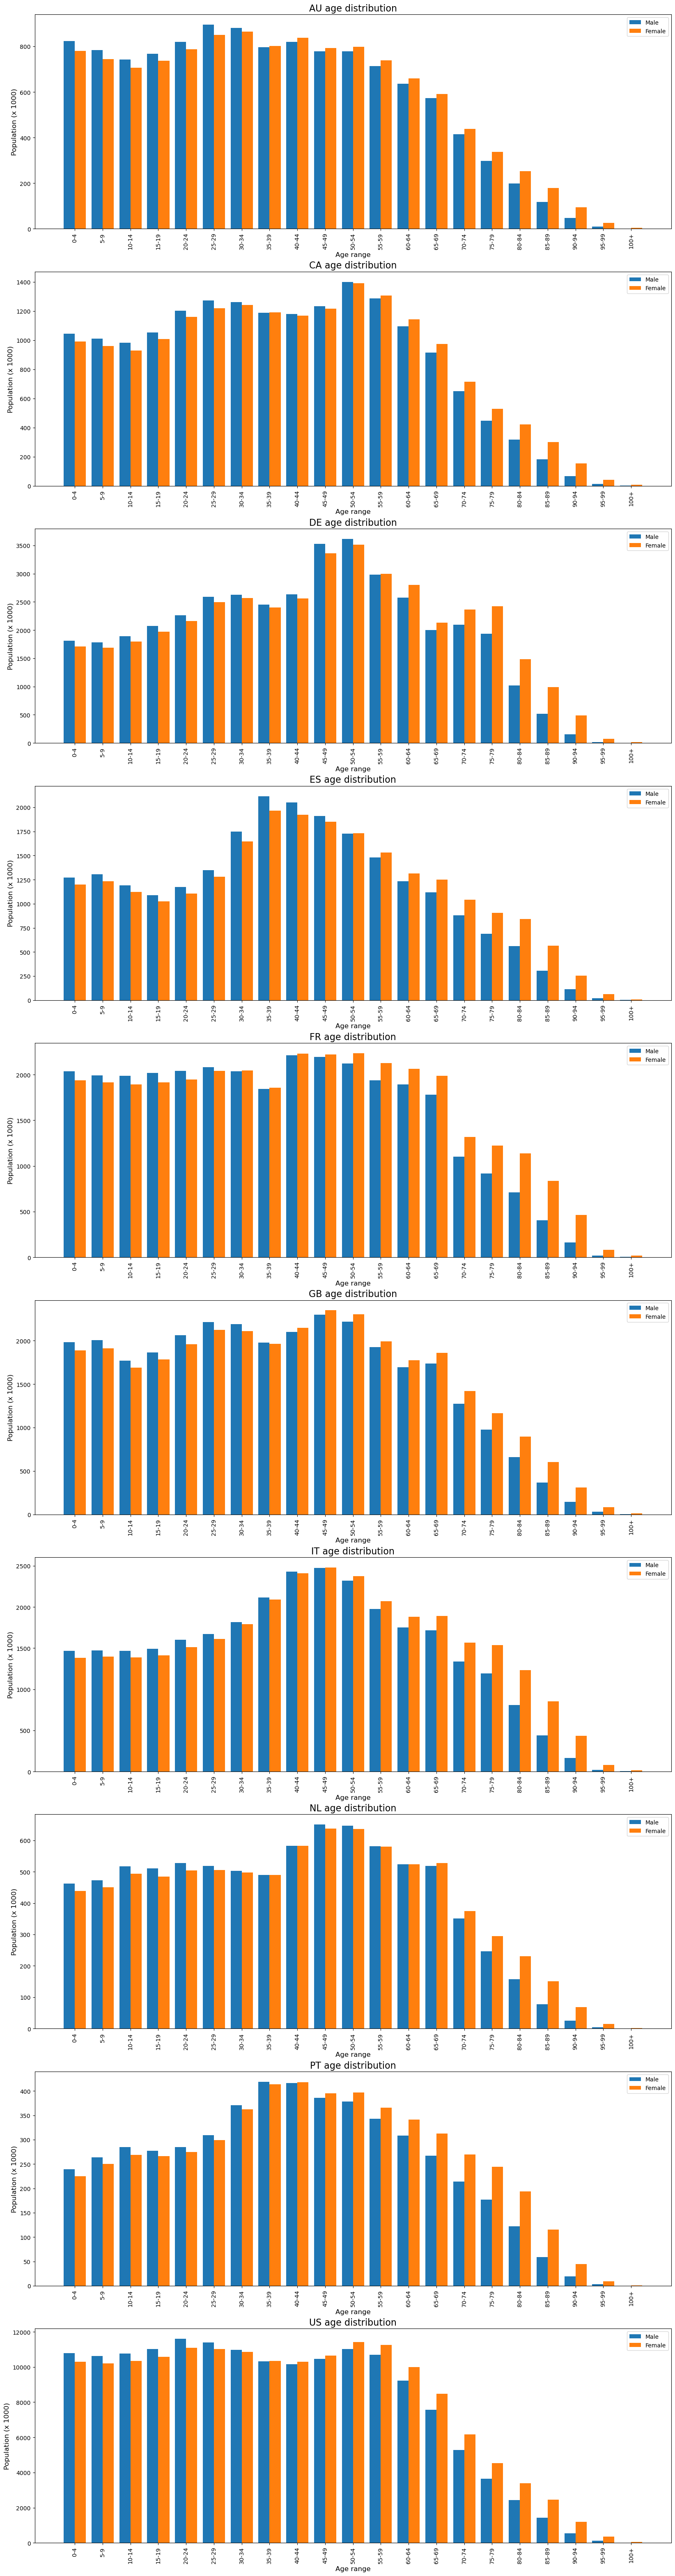

In [11]:
x_axis_labels = age_gender.age_bucket.unique()[::-1]
countries = age_gender.country_destination.unique()

fig = plt.figure(figsize=(20, 80))


for idx, country in enumerate(countries):
    data_male = age_gender[(age_gender["country_destination"] == country) & (age_gender["gender"] == 'male')]
    data_female = age_gender[(age_gender["country_destination"] == country) & (age_gender["gender"] == 'female')]
    
    base = pd.DataFrame(x_axis_labels, columns = ['0'])
    
    base = base.merge(data_male, how = 'left', left_on = '0' , right_on='age_bucket' )
    base = base.merge(data_female, how = 'left', left_on = '0' , right_on='age_bucket' )
    
    ax = fig.add_subplot(len(countries)  , 1 ,  idx + 1)
    
    names = x_axis_labels
    ind = np.arange(len(x_axis_labels))
  
    plt.title(f'{country} age distribution', fontsize=16)

    plt.xticks(ind, names, rotation = 90)
    plt.xlabel('Age range', fontsize=12)
    plt.ylabel('Population (x 1000)', fontsize=12)
    bar_width=0.4
    ax.bar(ind-bar_width/2, base["population_in_thousands_x"], width=bar_width, label = "Male")
    ax.bar(ind+bar_width/2, base["population_in_thousands_y"], width=bar_width, label = "Female")
    plt.legend()
    
plt.show()


### sessions.csv

In [13]:
sessions = pd.read_csv('sessions.csv')
print(sessions.shape)
sessions.head()

(10567737, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [14]:
sessions.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [15]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [16]:
print(f"Unique values for user_id column: {len(sessions.user_id.unique())}")

Unique values for user_id column: 135484


In [17]:
print(f"Unique values for action column: {len(sessions.action.unique())}")
print(f"Unique values for action column: {sessions.action.unique()}")

Unique values for action column: 360
Unique values for action column: ['lookup' 'search_results' 'personalize' 'index' 'similar_listings'
 'ajax_refresh_subtotal' 'show' 'header_userpic' 'ask_question' nan
 'other_hosting_reviews_first' 'hosting_social_proof' 'decision_tree'
 'recent_reservations' 'faq_experiment_ids' 'multi' 'active' 'dashboard'
 'create' 'confirm_email' 'show_personalize' 'verify' 'pending'
 'requested' 'concierge' 'faq' 'clear_reservation' 'cancellation_policies'
 'track_page_view' 'update' 'my' 'campaigns' 'notifications' 'listings'
 'unavailabilities' 'ajax_lwlb_contact' 'ajax_check_dates' 'qt2'
 'request_new_confirm_email' 'ajax_photo_widget_form_iframe'
 'facebook_auto_login' 'identity' 'qt_reply_v2' 'travel_plans_current'
 'complete_status' 'populate_from_facebook' 'kba_update' 'kba' 'login'
 'authenticate' 'calendar_tab_inner2' 'other_hosting_reviews'
 'social_connections' 'relationship' '15' 'collections' '12'
 'jumio_redirect' 'jumio_token' 'login_modal' 'do

In [18]:
print(f"Unique values for action_type column: {sessions.action_type.unique()}")

Unique values for action_type column: [nan 'click' 'data' 'view' 'submit' 'message_post' '-unknown-'
 'booking_request' 'partner_callback' 'booking_response' 'modify']


In [19]:
print(f"Unique values for action_detail column: {len(sessions.action_detail.unique())}")
print(f"Unique values for action_detail column: {sessions.action_detail.unique()}")

Unique values for action_detail column: 156
Unique values for action_detail column: [nan 'view_search_results' 'wishlist_content_update' 'similar_listings'
 'change_trip_characteristics' 'p3' 'header_userpic' 'contact_host'
 'message_post' '-unknown-' 'dashboard' 'create_user' 'confirm_email_link'
 'user_profile_content_update' 'user_profile' 'pending' 'p5'
 'create_phone_numbers' 'cancellation_policies' 'user_wishlists'
 'change_contact_host_dates' 'wishlist' 'message_thread'
 'request_new_confirm_email' 'send_message' 'your_trips' 'login_page'
 'login' 'login_modal' 'toggle_archived_thread' 'p1'
 'profile_verifications' 'edit_profile' 'oauth_login'
 'post_checkout_action' 'account_notification_settings'
 'update_user_profile' 'oauth_response' 'signup_modal' 'signup_login_page'
 'at_checkpoint' 'manage_listing' 'create_listing' 'your_listings'
 'profile_references' 'list_your_space' 'popular_wishlists'
 'listing_reviews_page' 'apply_coupon' 'user_tax_forms'
 'account_payout_preference

In [20]:
print(f"Unique values for device_type column: {sessions.device_type.unique()}")

Unique values for device_type column: ['Windows Desktop' '-unknown-' 'Mac Desktop' 'Android Phone' 'iPhone'
 'iPad Tablet' 'Android App Unknown Phone/Tablet' 'Linux Desktop' 'Tablet'
 'Chromebook' 'Blackberry' 'iPodtouch' 'Windows Phone' 'Opera Phone']


<Axes: xlabel='device_type'>

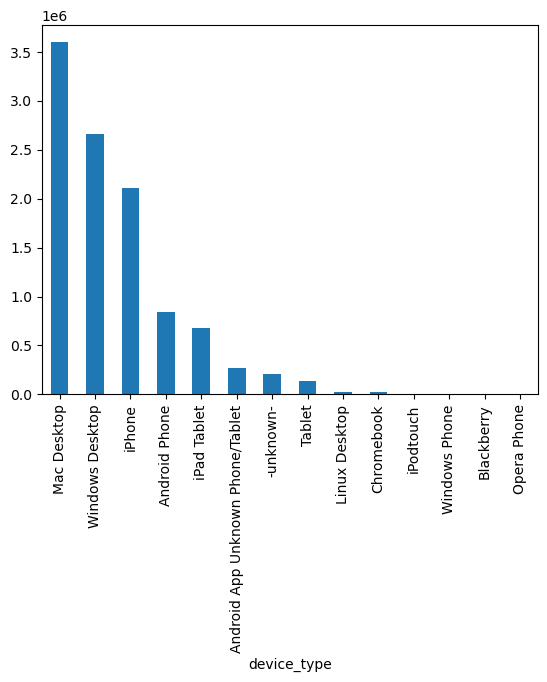

In [21]:
sessions['device_type'].value_counts().plot.bar()   

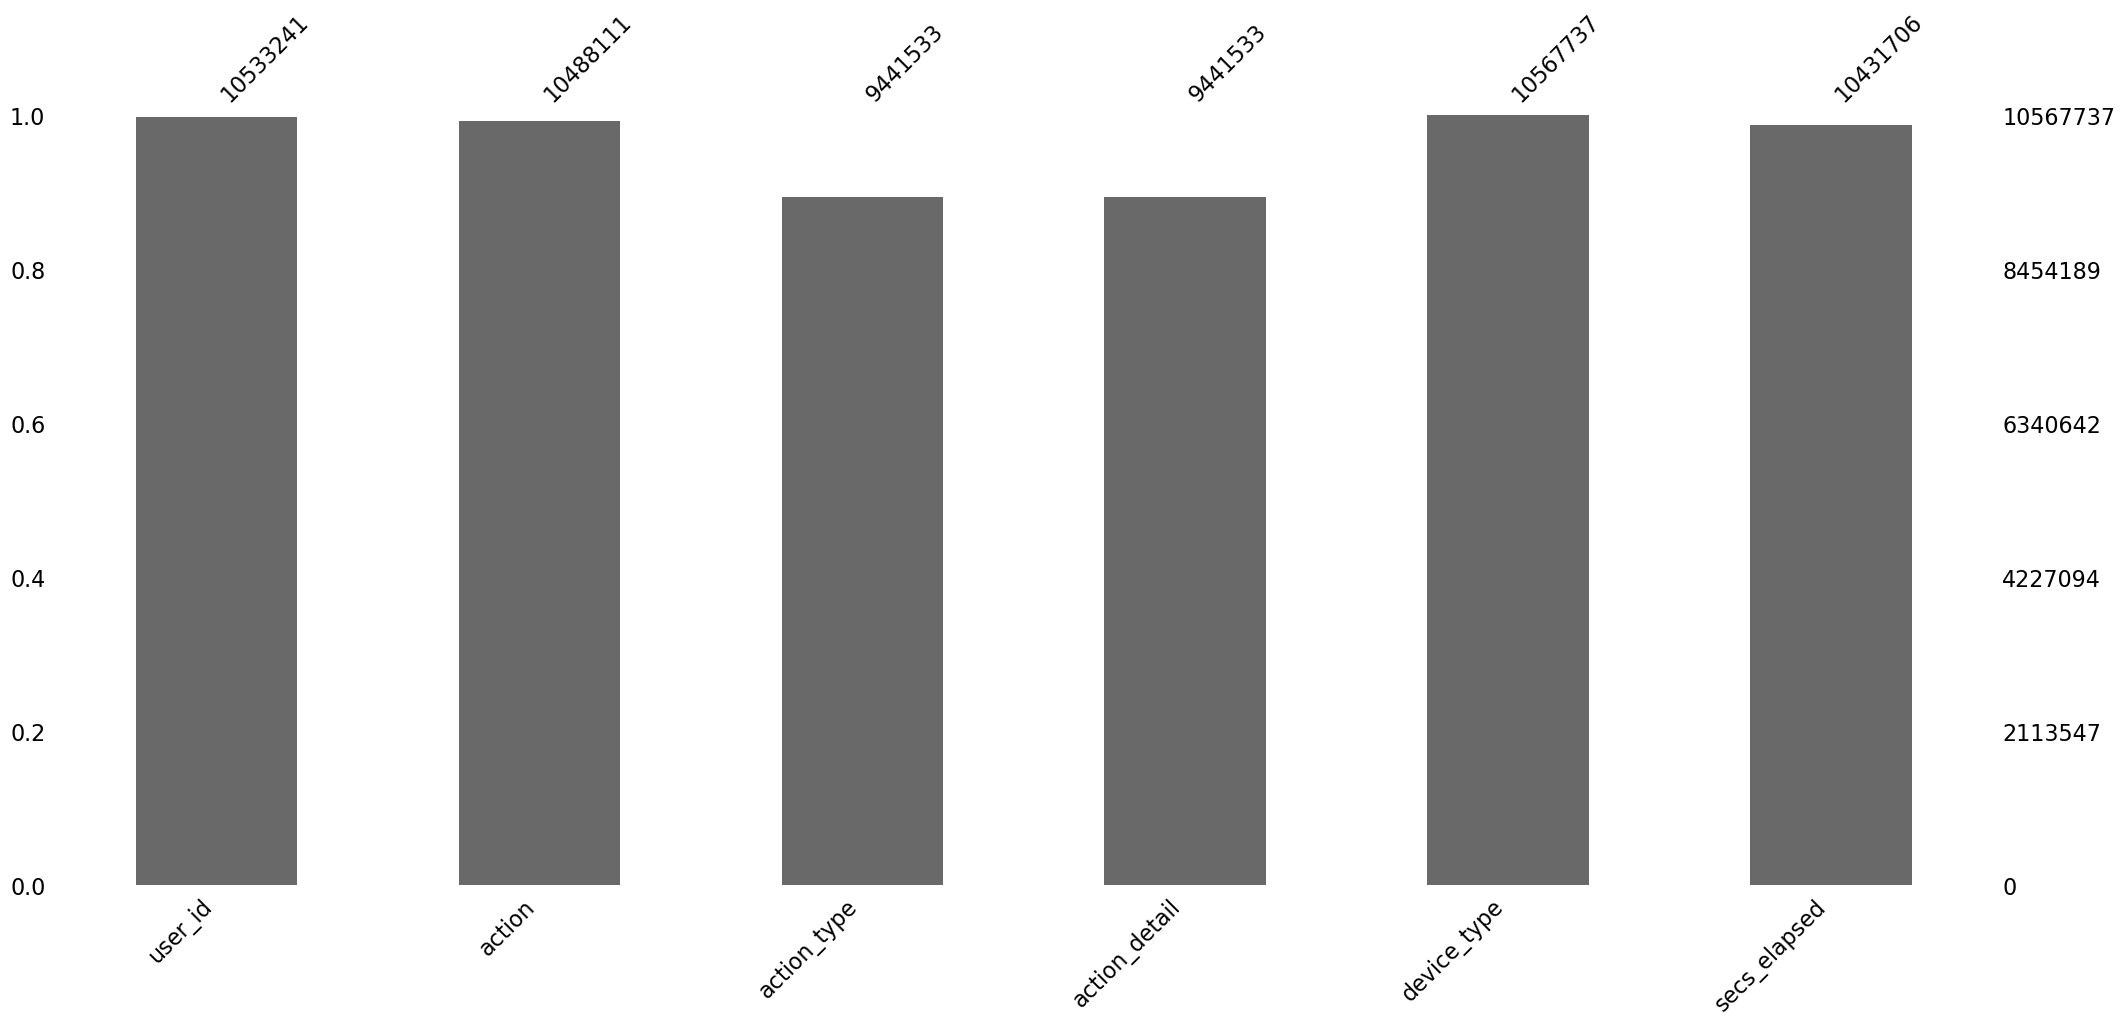

In [22]:
missingno.bar(sessions)
plt.show()

In [23]:
# fig = plt.figure(figsize=(20, 80))


# for idx, action in enumerate(sessions.action_type.unique()):
#     data_action = sessions[(sessions["action_type"] == action)][['action_type', 'secs_elapsed']]
#     print(data_action)
#     data_action.dropna(inplace= 'True')

    
#     ax = fig.add_subplot(sessions.action_type.unique()  , 1 ,  idx + 1)
    
#     plt.hist(data_action['secs_elapsed'], bins=30, color='skyblue', edgecolor='red')


  
#     plt.title(f'{actions} duration distribution', fontsize=16)
#     plt.legend()
    
    
# plt.show()


### train_users.csv

In [25]:
users = pd.read_csv('train_users_2.csv')
print(users.shape)
users.head()

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [27]:
users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


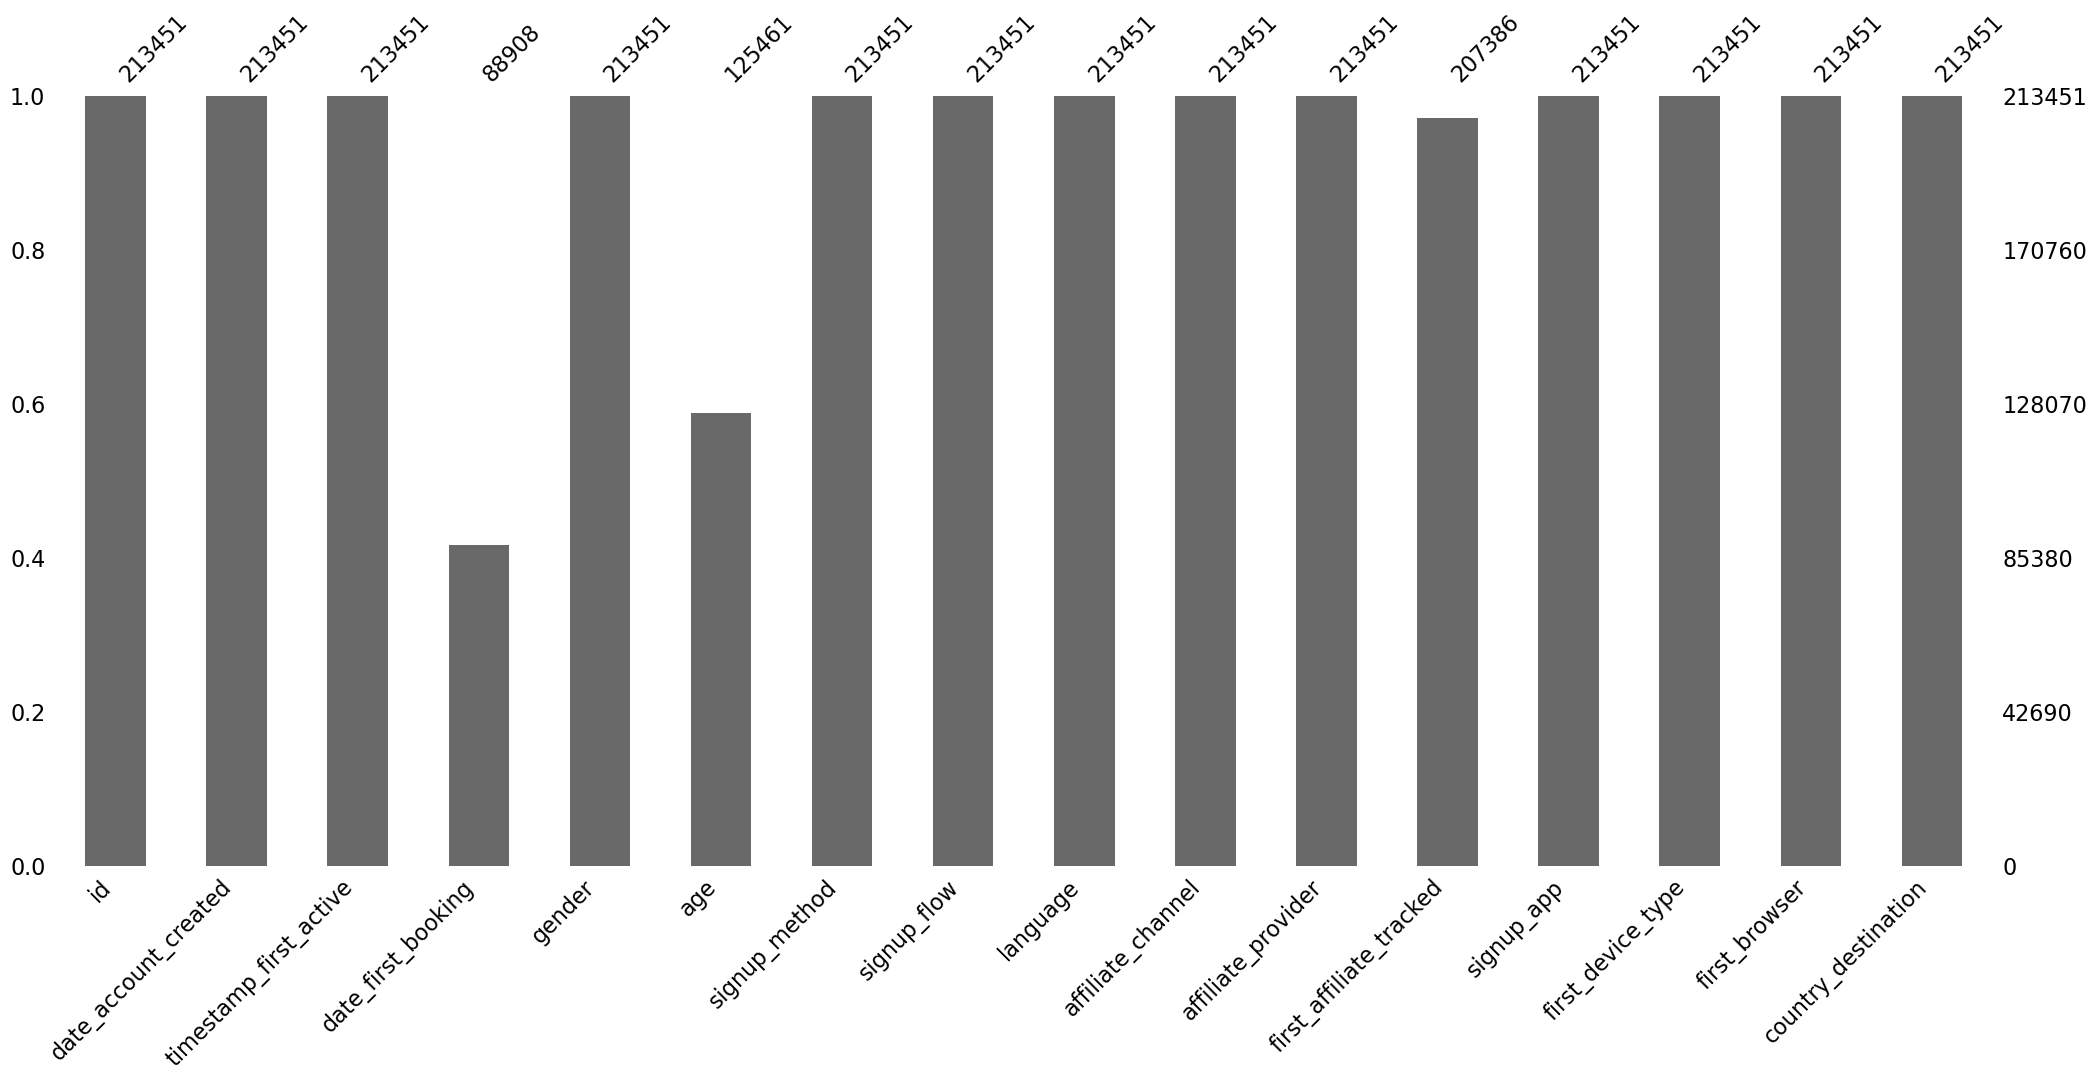

In [28]:
missingno.bar(users)
plt.show()

<Axes: >

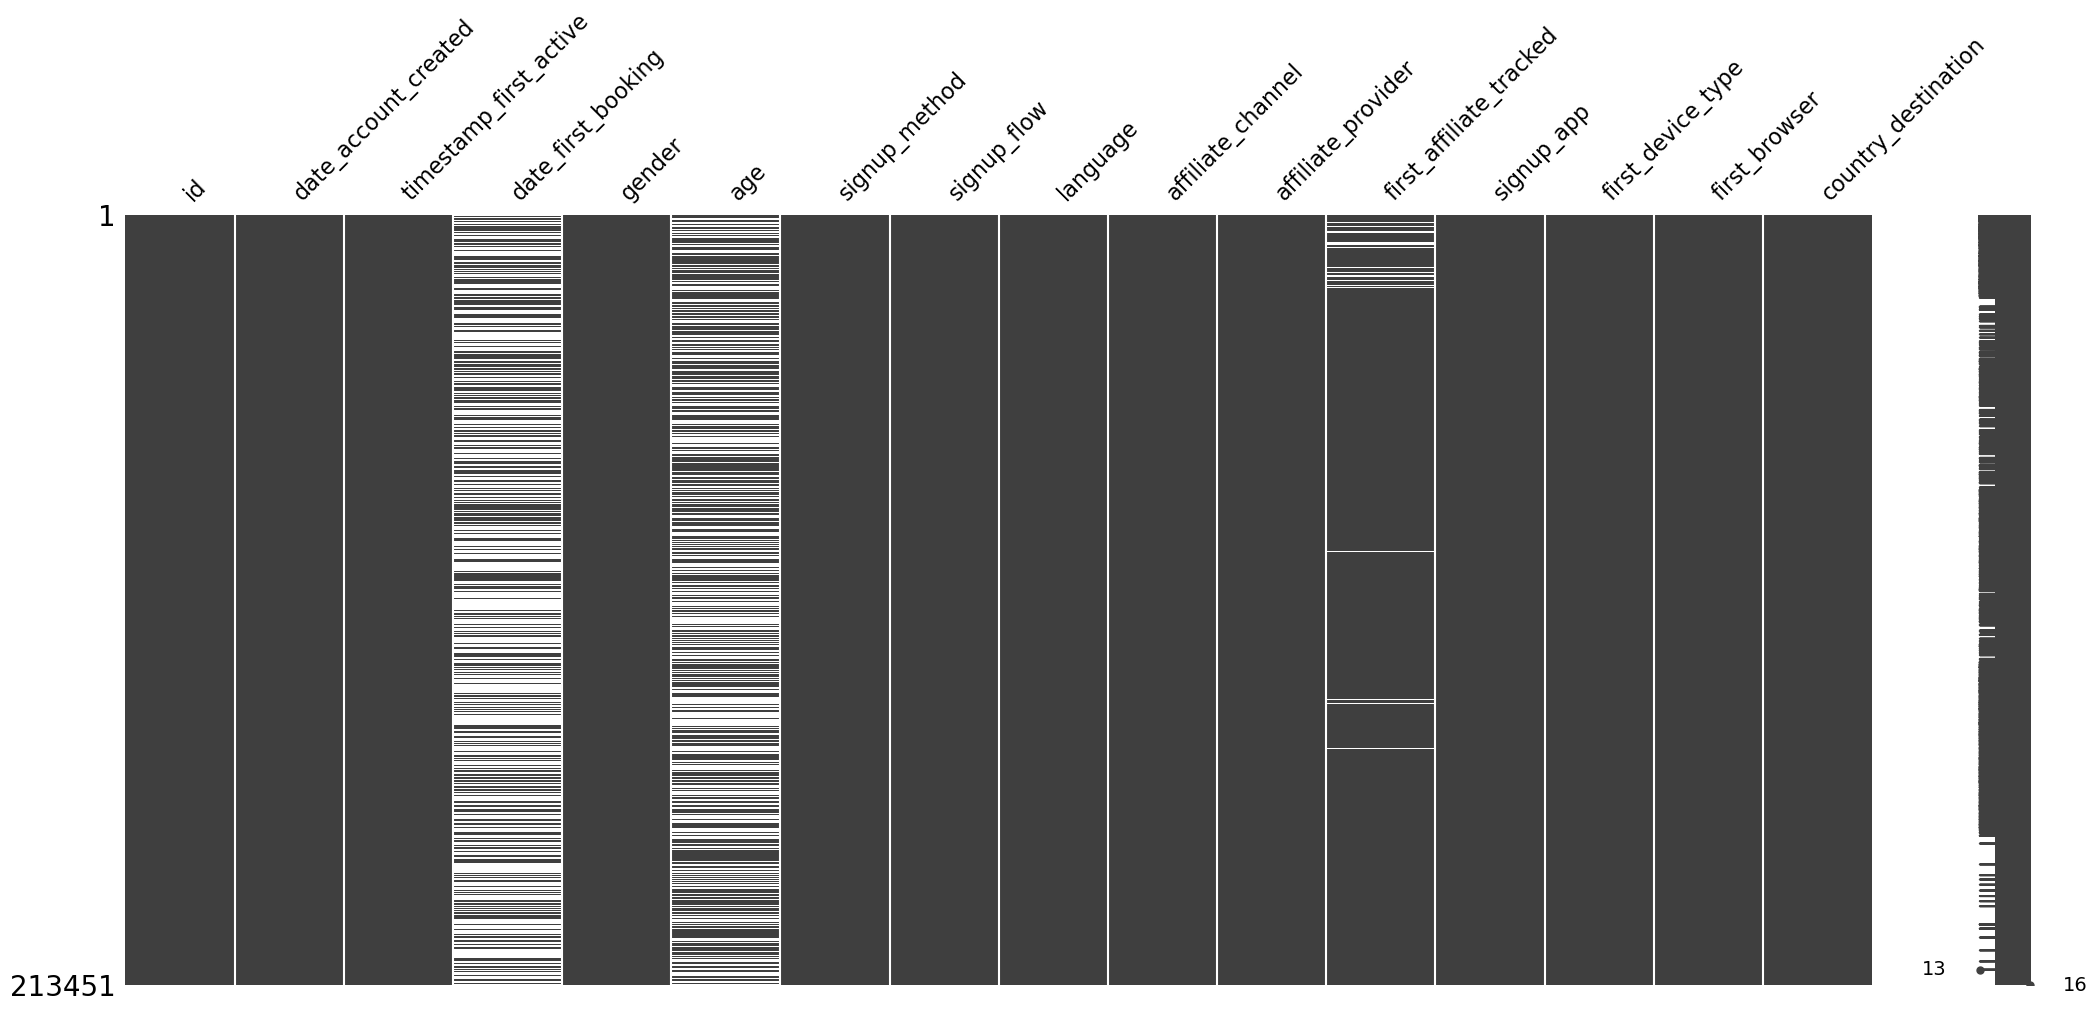

In [29]:
missingno.matrix(users)

C:\Users\User\AppData\Local\Temp\ipykernel_228436\4130463359.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users['age'], bins = 200);


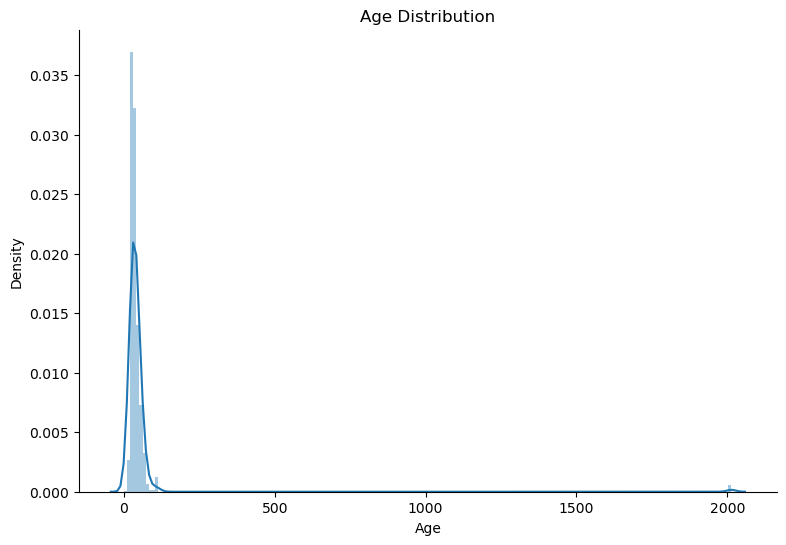

In [30]:
plt.figure(figsize=(9,6))
sns.distplot(users['age'], bins = 200);
plt.xlabel('Age')
plt.title('Age Distribution')
sns.despine();

C:\Users\User\AppData\Local\Temp\ipykernel_228436\3426680653.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users[(users['age'] < 500)][['age']], bins = 60);


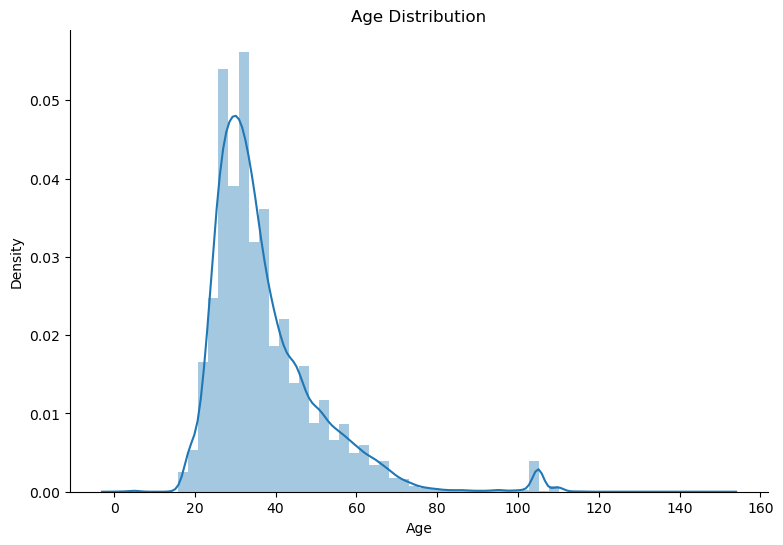

In [31]:
# age without outliers
plt.figure(figsize=(9,6))
sns.distplot(users[(users['age'] < 500)][['age']], bins = 60);
plt.xlabel('Age')
plt.title('Age Distribution')
sns.despine();

C:\Users\User\AppData\Local\Temp\ipykernel_228436\380171504.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")


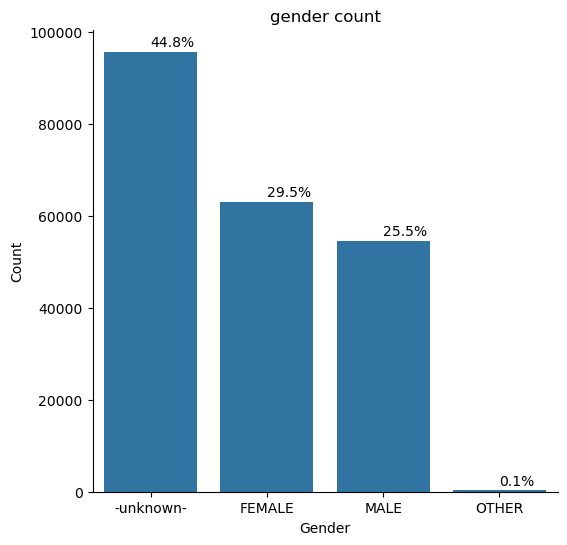

In [32]:
plt.figure(figsize=(6,6))
count = users['gender'].fillna('NaN').value_counts(dropna=False)
c_order = count.index
sns.countplot(x=users['gender'].fillna('NaN'), order=c_order)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('gender count')
for i in range(count.shape[0]):
    plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")
sns.despine()

C:\Users\User\AppData\Local\Temp\ipykernel_228436\1766126274.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")


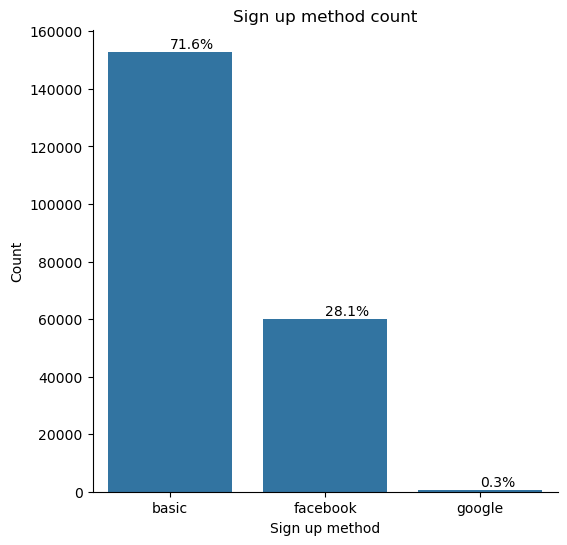

In [33]:
plt.figure(figsize=(6,6))
count = users['signup_method'].fillna('NaN').value_counts(dropna=False)
c_order = count.index
sns.countplot(x=users['signup_method'].fillna('NaN'), order=c_order)
plt.xlabel('Sign up method')
plt.ylabel('Count')
plt.title('Sign up method count')
for i in range(count.shape[0]):
    plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")
sns.despine()

C:\Users\User\AppData\Local\Temp\ipykernel_228436\1879875305.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")


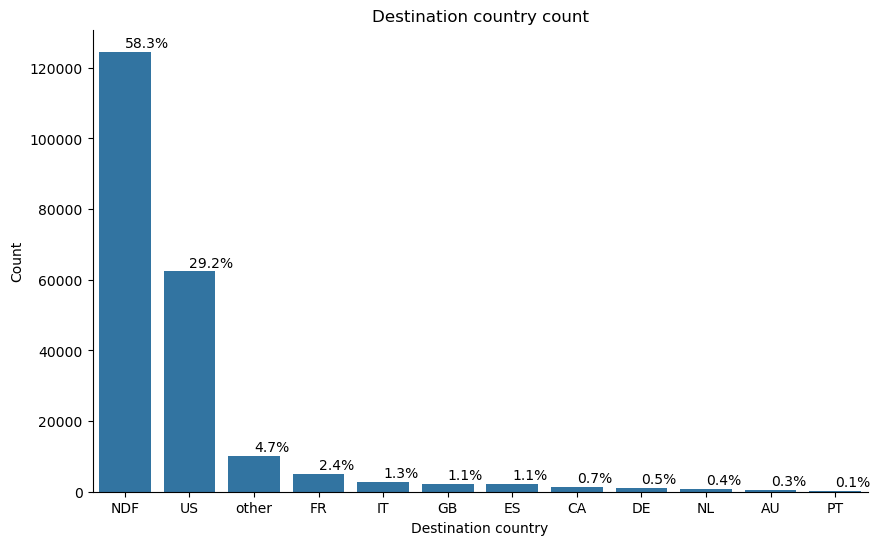

In [34]:
plt.figure(figsize=(10,6))
count = users['country_destination'].fillna('NaN').value_counts(dropna=False)
c_order = count.index
sns.countplot(x=users['country_destination'].fillna('NaN'), order=c_order)
plt.xlabel('Destination country')
plt.ylabel('Count')
plt.title('Destination country count')
for i in range(count.shape[0]):
    plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")
sns.despine()

C:\Users\User\AppData\Local\Temp\ipykernel_228436\3196452541.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")


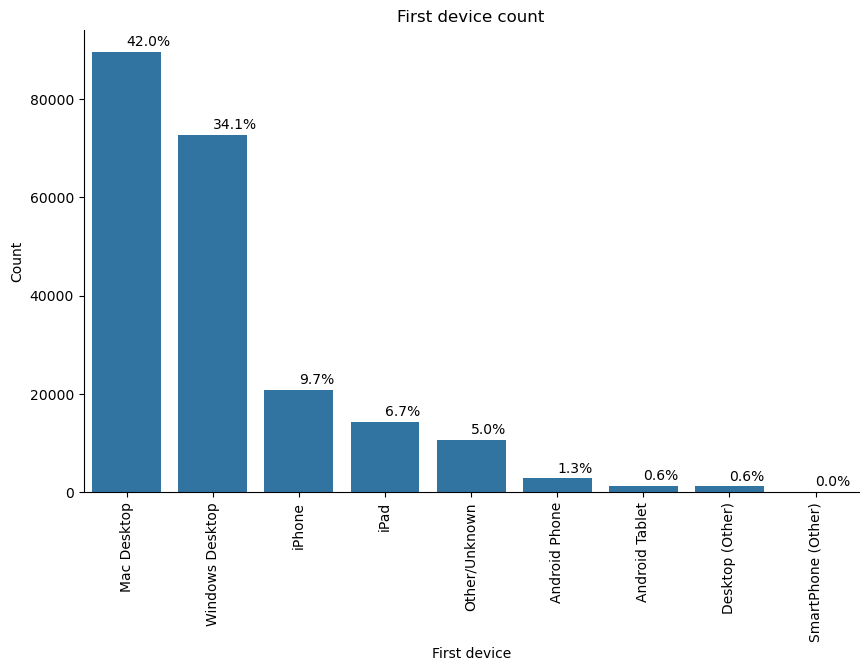

In [35]:
plt.figure(figsize=(10,6))
count = users['first_device_type'].fillna('NaN').value_counts(dropna=False)
c_order = count.index
sns.countplot(x=users['first_device_type'].fillna('NaN'), order=c_order)
plt.xlabel('First device')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('First device count')
for i in range(count.shape[0]):
    plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")
sns.despine()

C:\Users\User\AppData\Local\Temp\ipykernel_228436\1133683552.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")


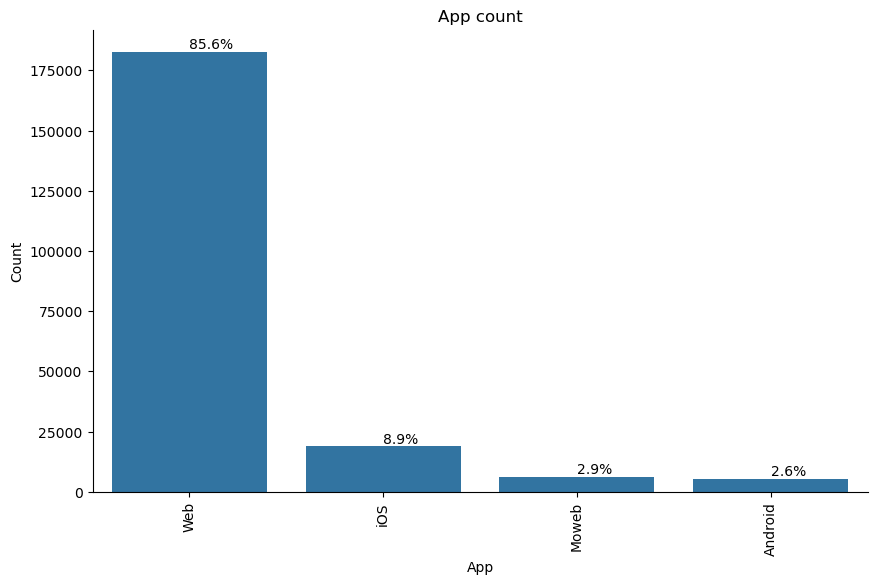

In [36]:
plt.figure(figsize=(10,6))
count = users['signup_app'].fillna('NaN').value_counts(dropna=False)
c_order = count.index
sns.countplot(x=users['signup_app'].fillna('NaN'), order=c_order)
plt.xlabel('App')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('App count')
for i in range(count.shape[0]):
    plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")
sns.despine()

C:\Users\User\AppData\Local\Temp\ipykernel_228436\1870401689.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")


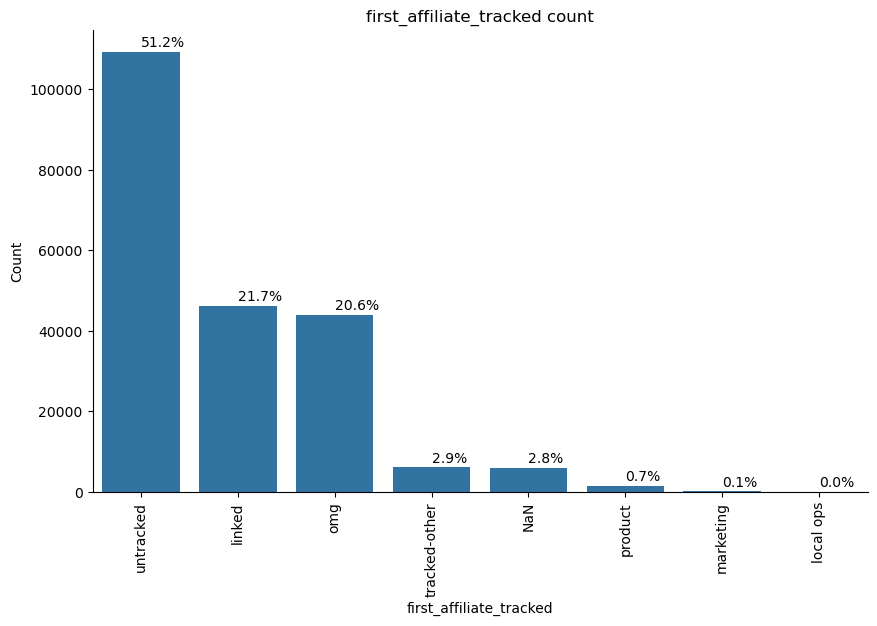

In [37]:
plt.figure(figsize=(10,6))
count = users['first_affiliate_tracked'].fillna('NaN').value_counts(dropna=False)
c_order = count.index
sns.countplot(x=users['first_affiliate_tracked'].fillna('NaN'), order=c_order)
plt.xlabel('first_affiliate_tracked')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('first_affiliate_tracked count')
for i in range(count.shape[0]):
    plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")
sns.despine()

C:\Users\User\AppData\Local\Temp\ipykernel_228436\90136438.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")


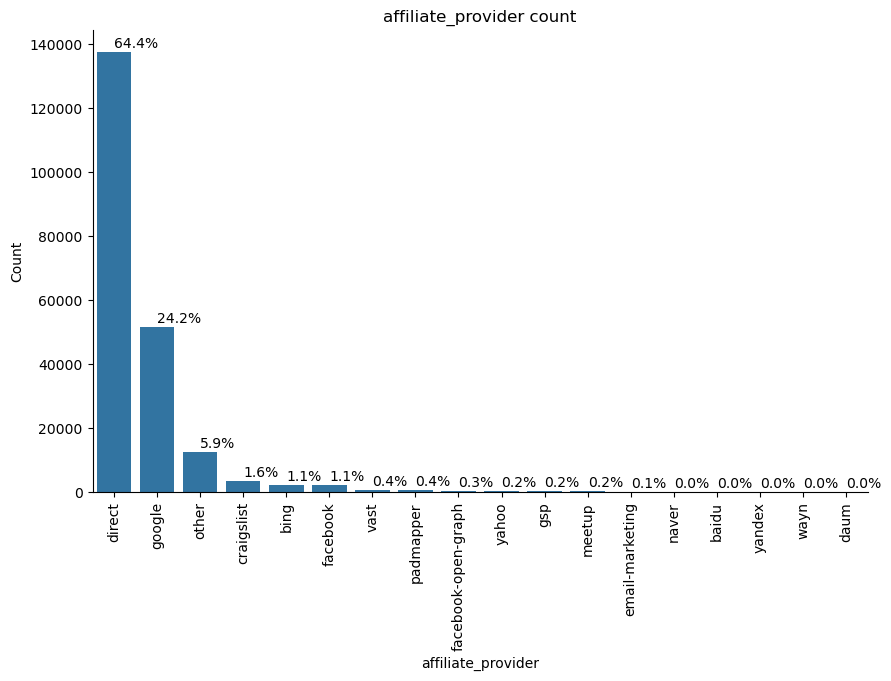

In [38]:
plt.figure(figsize=(10,6))
count = users['affiliate_provider'].fillna('NaN').value_counts(dropna=False)
c_order = count.index
sns.countplot(x=users['affiliate_provider'].fillna('NaN'), order=c_order)
plt.xlabel('affiliate_provider')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('affiliate_provider count')
for i in range(count.shape[0]):
    plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")
sns.despine()

C:\Users\User\AppData\Local\Temp\ipykernel_228436\2353468984.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")


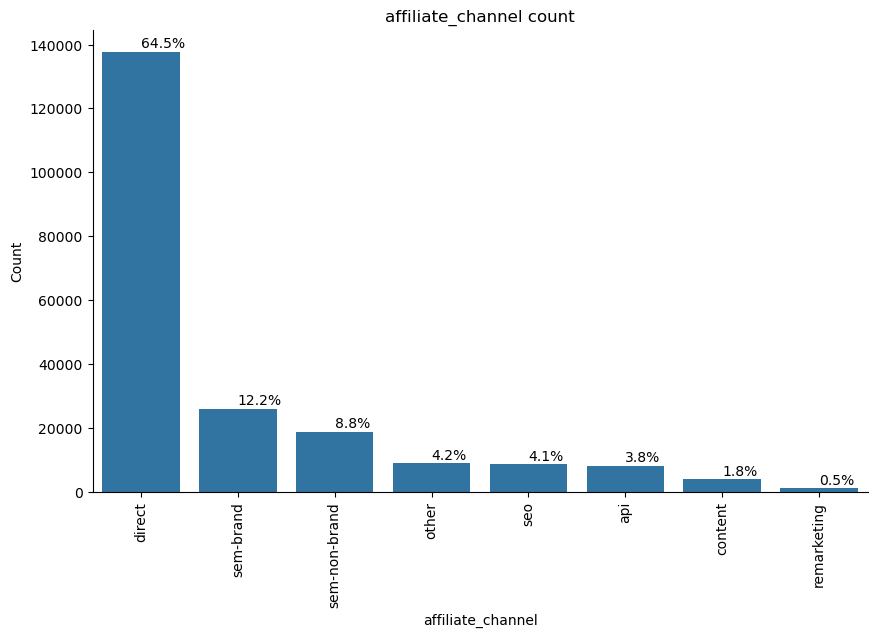

In [39]:
plt.figure(figsize=(10,6))
count = users['affiliate_channel'].fillna('NaN').value_counts(dropna=False)
c_order = count.index
sns.countplot(x=users['affiliate_channel'].fillna('NaN'), order=c_order)
plt.xlabel('affiliate_channel')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('affiliate_channel count')
for i in range(count.shape[0]):
    plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")
sns.despine()

C:\Users\User\AppData\Local\Temp\ipykernel_228436\1821512480.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")


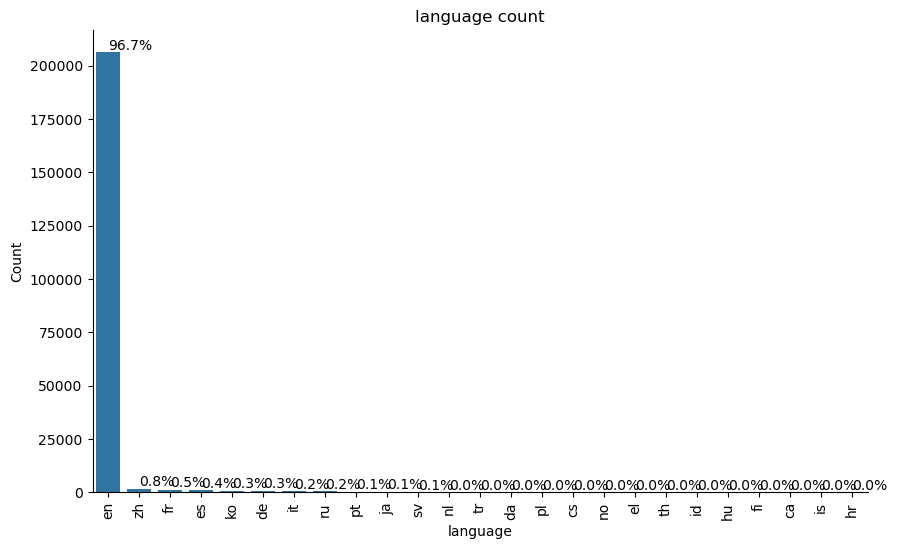

In [40]:
plt.figure(figsize=(10,6))
count = users['language'].fillna('NaN').value_counts(dropna=False)
c_order = count.index
sns.countplot(x=users['language'].fillna('NaN'), order=c_order)
plt.xlabel('language')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('language count')
for i in range(count.shape[0]):
    plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")
sns.despine()

C:\Users\User\AppData\Local\Temp\ipykernel_228436\3321403174.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(counts[i]+5200, i+0.09, f"{counts[i]/users.shape[0]*100:0.2f}%", ha='center', fontsize=10)


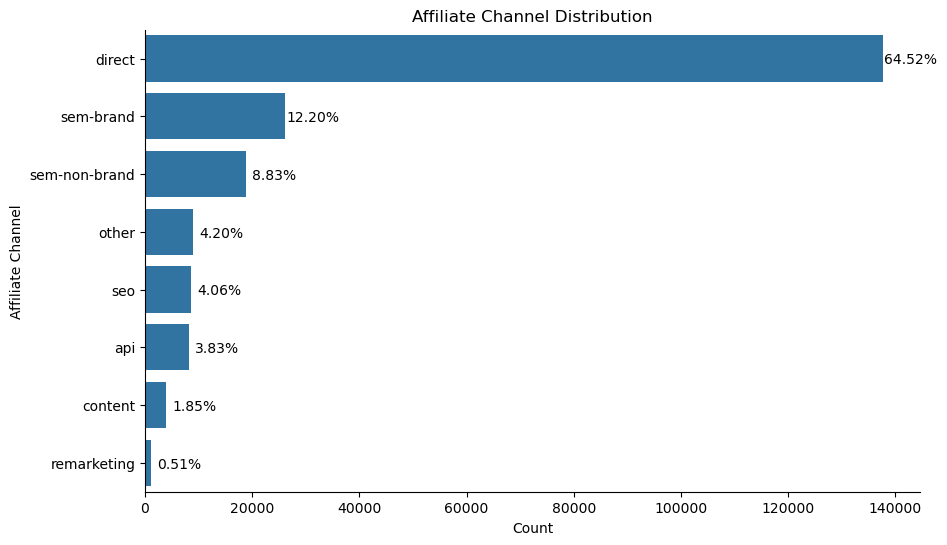

In [41]:
plt.figure(figsize=(10,6))
counts = users['affiliate_channel'].value_counts()
counts_order = counts.index
sns.countplot(y=users['affiliate_channel'], order=counts_order)
plt.ylabel('Affiliate Channel')
plt.xlabel('Count')
plt.title('Affiliate Channel Distribution')
for i in range(counts.shape[0]):
    plt.text(counts[i]+5200, i+0.09, f"{counts[i]/users.shape[0]*100:0.2f}%", ha='center', fontsize=10)
sns.despine()

C:\Users\User\AppData\Local\Temp\ipykernel_228436\3968544140.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")


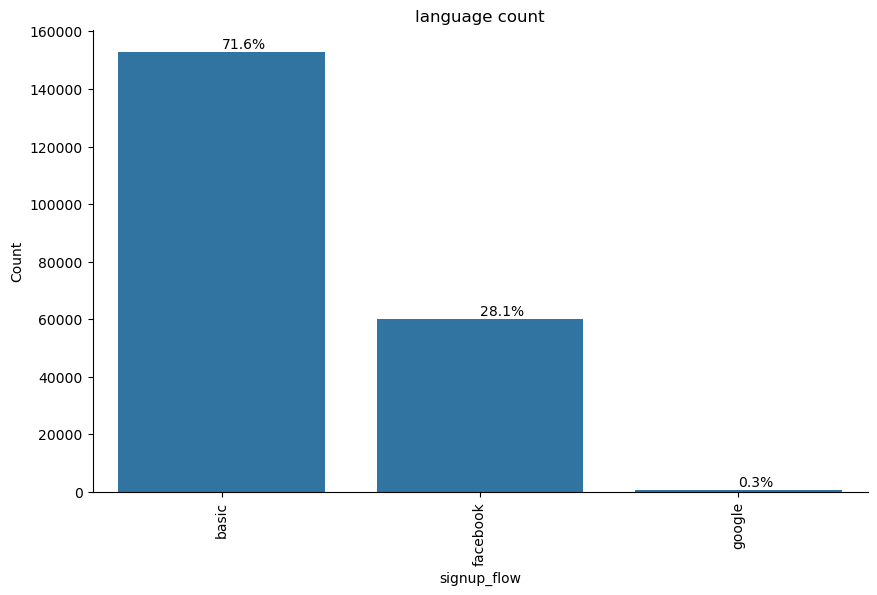

In [42]:
plt.figure(figsize=(10,6))
count = users['signup_method'].fillna('NaN').value_counts(dropna=False)
c_order = count.index
sns.countplot(x=users['signup_method'].fillna('NaN'), order=c_order)
plt.xlabel('signup_flow')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('language count')
for i in range(count.shape[0]):
    plt.text(i, count[i]+1200, f"{count[i]/users.shape[0]*100:0.1f}%")
sns.despine()

In [43]:
users['first_browser'].fillna('NaN').value_counts(dropna=False)

first_browser
Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                   

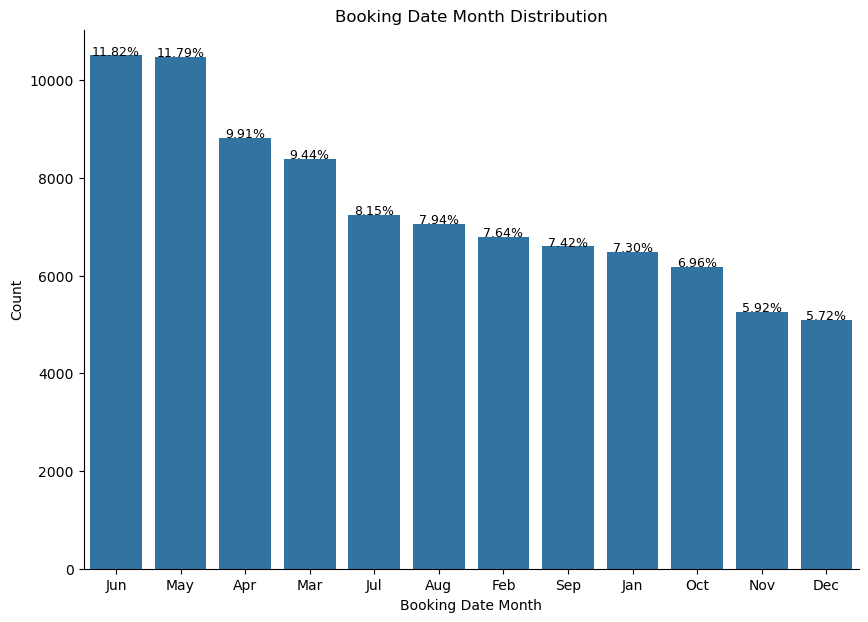

In [44]:
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'], errors='coerce')
plt.figure(figsize=(10, 7))

months_freq = users['date_first_booking'].dropna().dt.month_name().str[:3]

counts = months_freq.value_counts()
counts_order = counts.index

sns.countplot(x=months_freq, order=counts_order)
plt.xlabel('Booking Date Month')
plt.ylabel('Count')
plt.title('Booking Date Month Distribution')

for i, count in enumerate(counts):
    percentage = count / months_freq.shape[0] * 100
    plt.text(i, count + 10, f"{percentage:.2f}%", ha='center', fontsize=9)
sns.despine()
plt.show()

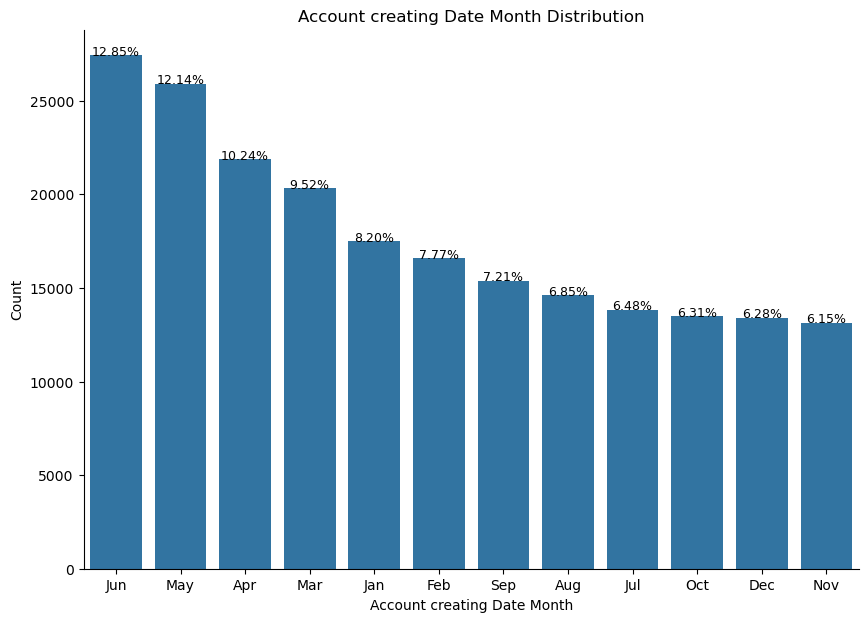

In [45]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'], errors='coerce')
plt.figure(figsize=(10, 7))

months_freq = users['date_account_created'].dropna().dt.month_name().str[:3]

counts = months_freq.value_counts()
counts_order = counts.index

sns.countplot(x=months_freq, order=counts_order)
plt.xlabel('Account creating Date Month')
plt.ylabel('Count')
plt.title('Account creating Date Month Distribution')

for i, count in enumerate(counts):
    percentage = count / months_freq.shape[0] * 100
    plt.text(i, count + 10, f"{percentage:.2f}%", ha='center', fontsize=9)
sns.despine()
plt.show()